# Project 1 : Unemployment Rate Analysis

## Setup Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
print("All packages imported successfully!")
print(f"Pandas version: {pd.__version__}")
# Test loading the data file
df = pd.read_csv('UNRATE.csv')
print(f"Data loaded successfully! Shape: {df.shape}")

Matplotlib is building the font cache; this may take a moment.


All packages imported successfully!
Pandas version: 2.3.0
Data loaded successfully! Shape: (928, 2)


## Data Loading

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the provided unemployment data
df = pd.read_csv('UNRATE.csv')
# Convert DATE column to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (928, 2)

First 5 rows:


,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


## Basic Exploration

In [11]:
print(f"\nData types:",df.dtypes)
# Unrate statistics:
print(f"\nBasic statistics for unrate:", df['UNRATE'].describe())
# Observation Date statistics:
print(f"\nBasic statistics for observation_date:", df['observation_date'].describe())


Data types: observation_date    datetime64[ns]
UNRATE                     float64
dtype: object

Basic statistics for unrate: count    928.000000
mean       5.676724
std        1.708352
min        2.500000
25%        4.300000
50%        5.500000
75%        6.700000
max       14.800000
Name: UNRATE, dtype: float64

Basic statistics for observation_date: count                              928
mean     1986-08-16 11:07:14.482758592
min                1948-01-01 00:00:00
25%                1967-04-23 12:00:00
50%                1986-08-16 12:00:00
75%                2005-12-08 18:00:00
max                2025-04-01 00:00:00
Name: observation_date, dtype: object


## Statistical Analysis

In [12]:
print("\nStatistical Analysis (15 points)")


Statistical Analysis (15 points)


### Overall Average Unemployment Rate:

In [13]:
# The overall average unemployment rate
average_unemployment_rate = df['UNRATE'].mean()
print(f"\n Overall average unemployment rate: {average_unemployment_rate:.2f}%")


 Overall average unemployment rate: 5.68%


### Minimum and Maximum Unemployment Rates with Dates:

In [14]:
# Minimum Unemployment rate
print(f"\n Minimum unemployment rate:{df[df['UNRATE'] == df['UNRATE'].min()]}")
# Maximum Unemployment rate
print(f"\n Maximum unemployment rate:{df[df['UNRATE'] == df['UNRATE'].max()]}")


 Minimum unemployment rate:   observation_date  UNRATE
64       1953-05-01     2.5
65       1953-06-01     2.5

 Maximum unemployment rate:    observation_date  UNRATE
867       2020-04-01    14.8


### Unemployment Statistics by Decade:

In [16]:
# New column 'Decade'
df['decade_col'] = (df['observation_date'].dt.year // 10) * 10
# Statistics by decade 
decade_statistics = df.groupby('decade_col')['UNRATE'].agg(['mean', 'min', 'max', 'std', 'count']).round(2)
print(f"\n Unemployment Statistics by Decade:{decade_statistics}")


 Unemployment Statistics by Decade:            mean  min   max   std  count
decade_col                              
1940        4.90  3.4   7.9  1.38     24
1950        4.51  2.5   7.5  1.29    120
1960        4.78  3.4   7.1  1.07    120
1970        6.22  3.9   9.0  1.16    120
1980        7.27  5.0  10.8  1.48    120
1990        5.76  4.0   7.8  1.05    120
2000        5.54  3.8  10.0  1.45    120
2010        6.22  3.5   9.9  2.06    120
2020        4.90  3.4  14.8  2.28     64


### Year of The Highest Average Unemployment Rate:

In [19]:
# New column Year
df['Year_col'] = df['observation_date'].dt.year
# Calculate the average unrate per year
average_unrate_by_year = df.groupby('Year_col')['UNRATE'].mean()
# Find the year of the highest average
max_average_year = average_unrate_by_year.idxmax()
# Print the value
print(f"\n The highest average unemployment rate was {average_unrate_by_year.max():.2f}% in {max_average_year}.")


 The highest average unemployment rate was 9.71% in 1982.


## Business Questions to Answer

### What was the unemployment rate during major economic events (2008 financial crisis, COVID-19 pandemic)?

#### 2008 Financial Crisis
The 2008 financial crisis was triggered by the collapse of the housing market and major financial institutions. It led to a severe global recession. In the U.S., unemployment rose sharply as businesses cut jobs during the economic downturn. Between mid-2007 and mid-2010, unemployment peaked above 10%, reflecting the deep impact on labor markets.

In [21]:
# 2008 Financial Crisis Custom Period 
gfc_period = df[(df['observation_date'] >= '2007-07-01') & (df['observation_date'] <= '2010-06-30')]
peak_gfc = gfc_period.loc[gfc_period['UNRATE'].idxmax()]
avg_gfc = gfc_period['UNRATE'].mean()
print("\n2008 Financial Crisis (Jul 2007 - Jun 2010)")
print(f" Peak Unemployment: {peak_gfc['UNRATE']}% in {peak_gfc['observation_date'].strftime('%b %Y')}")
print(f" Average Unemployment: {avg_gfc:.2f}%\n")


2008 Financial Crisis (Jul 2007 - Jun 2010)
 Peak Unemployment: 10.0% in Oct 2009
 Average Unemployment: 7.44%



#### COVID-19 Pandemic
The COVID-19 pandemic caused an unprecedented economic shock. Lockdowns and business closures led to massive job losses in early 2020. Unemployment spiked quickly, reaching a record high of 14.8% in April 2020, the highest rate since World War II. Although recovery followed, the average unemployment rate remained elevated through 2021 and beyond.

In [ ]:
# COVID-19 Period (Feb 2020 – Apr 2023)
covid_period = df[(df['observation_date'] >= '2020-02-01') & (df['observation_date'] <= '2023-04-30')]
peak_covid = covid_period.loc[covid_period['UNRATE'].idxmax()]
avg_covid = covid_period['UNRATE'].mean()
print("\nCOVID-19 Pandemic (Feb 2020 - Apr 2023)")
print(f" Peak Unemployment: {peak_covid['UNRATE']}% in {peak_covid['observation_date'].strftime('%b %Y')}")
print(f" Average Unemployment: {avg_covid:.2f}%")



COVID-19 Pandemic (Feb 2020 - Apr 2023)
 Peak Unemployment: 14.8% in Apr 2020
 Average Unemployment: 5.53%


### Which decade had the most stable unemployment rates (lowest standard deviation)?

In [24]:
# Calculate standard deviation by decade (decade column added previously)
stability = df.groupby('decade_col')['UNRATE'].std()
# Find most stable decade
best_decade = stability.idxmin()
lowest_std = stability.min()
print("\nMost Stable Decade Analysis")
print(f" The decade with the lowest variation in unemployment was the {best_decade}s")
print(f" Standard deviation: {lowest_std:.2f}%")


Most Stable Decade Analysis
 The decade with the lowest variation in unemployment was the 1990s
 Standard deviation: 1.05%


### What’s the trend in unemployment over the last 10 years?


Trend in Unemployment (Last 10 Years)
observation_date  UNRATE
      2016-01-01     4.8
      2016-02-01     4.9
      2016-03-01     5.0
      2016-04-01     5.1
      2016-05-01     4.8
      2016-06-01     4.9
      2016-07-01     4.8
      2016-08-01     4.9
      2016-09-01     5.0
      2016-10-01     4.9
      2016-11-01     4.7
      2016-12-01     4.7
      2017-01-01     4.7
      2017-02-01     4.6
      2017-03-01     4.4
      2017-04-01     4.4
      2017-05-01     4.4
      2017-06-01     4.3
      2017-07-01     4.3
      2017-08-01     4.4
      2017-09-01     4.3
      2017-10-01     4.2
      2017-11-01     4.2
      2017-12-01     4.1
      2018-01-01     4.0
      2018-02-01     4.1
      2018-03-01     4.0
      2018-04-01     4.0
      2018-05-01     3.8
      2018-06-01     4.0
      2018-07-01     3.8
      2018-08-01     3.8
      2018-09-01     3.7
      2018-10-01     3.8
      2018-11-01     3.8
      2018-12-01     3.9
      2019-01-01     4.0
      2019-

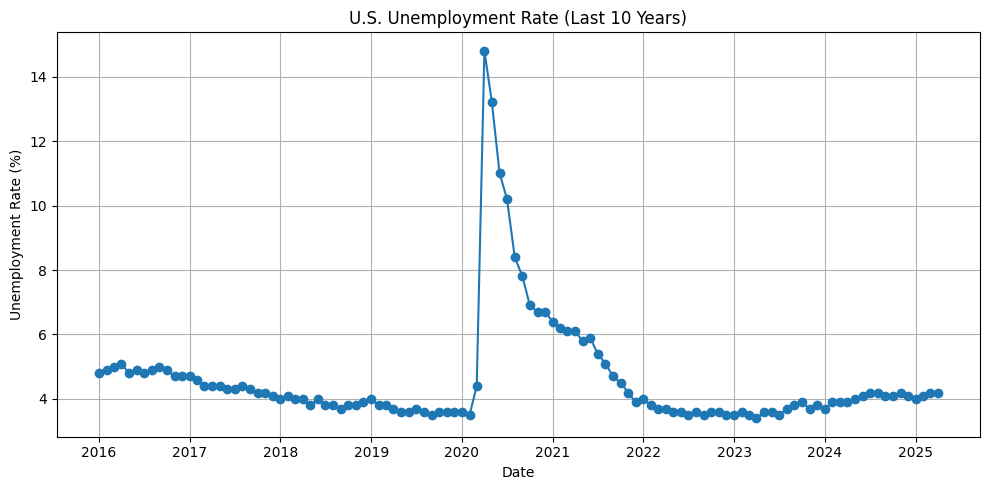

In [26]:
# Filter last 10 years (year column added previously)
latest_year = df['Year_col'].max()
recent_years = df[df['Year_col'] >= latest_year - 9]
# Summarize trend
print("\nTrend in Unemployment (Last 10 Years)")
print(recent_years[['observation_date', 'UNRATE']].reset_index(drop=True).to_string(index=False))
# Plot
plt.figure(num='Figure1:U.S. Unemployment Rate (Last 10 Years)', figsize=(10, 5))
plt.plot(recent_years['observation_date'], recent_years['UNRATE'], marker='o')
plt.title("U.S. Unemployment Rate (Last 10 Years)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Data Visualization

### Unemployment Rate Over Time

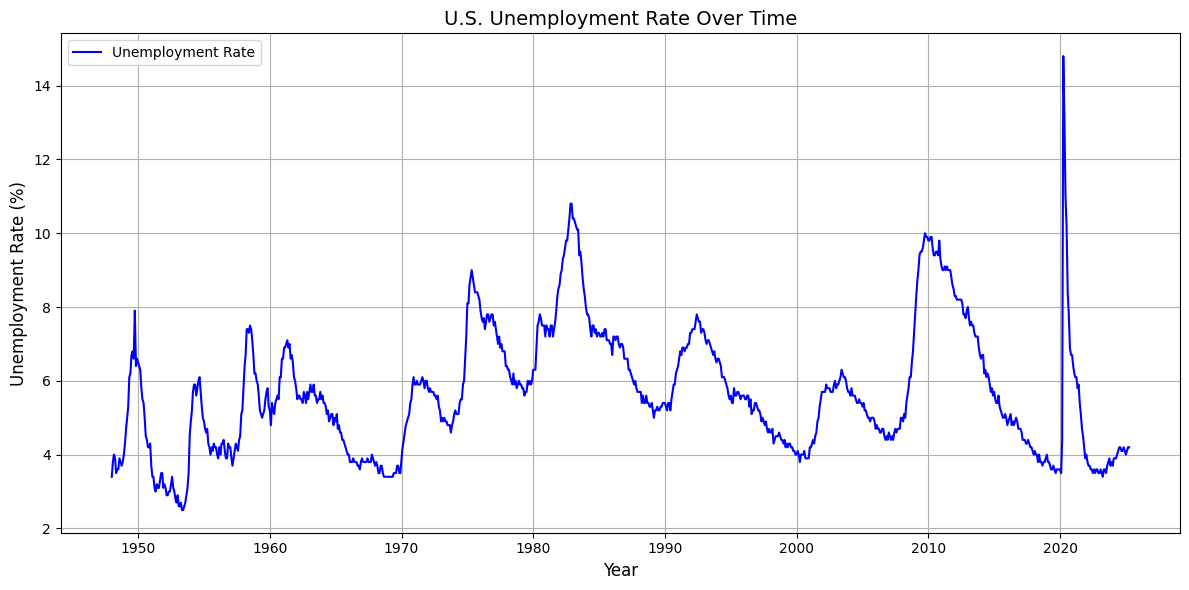

In [44]:
plt.figure(num='figure 2:Unemployment Rate Over Time', figsize=(12, 6))
plt.plot(df['observation_date'], df['UNRATE'], color='blue', linewidth=1.5, label='Unemployment Rate')  # <-- Add label here
plt.title('U.S. Unemployment Rate Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()  # Now this will display 'Unemployment Rate'
plt.tight_layout()
plt.savefig("unemployment_over_time.png")
plt.show()

### Average Unemployment Rate by Decade

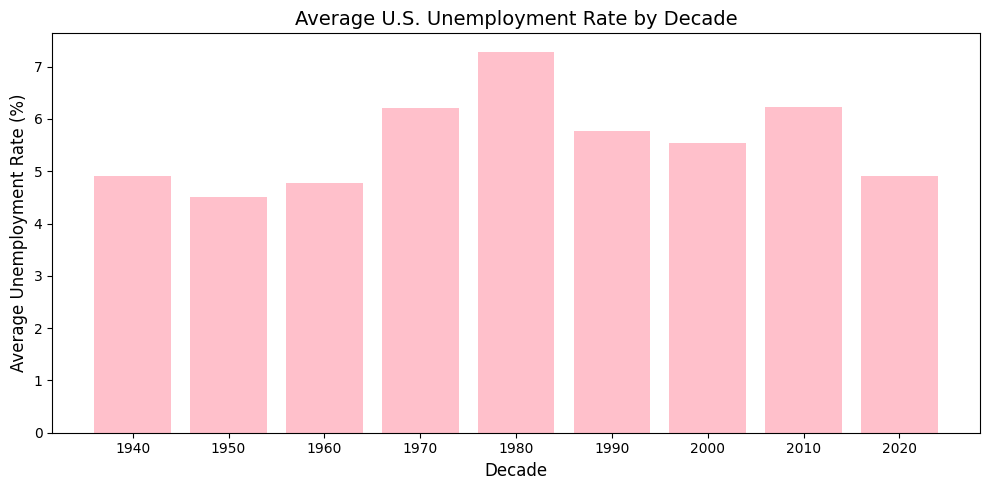

In [45]:
# Calculate average by decade
decade_avg = df.groupby('decade_col')['UNRATE'].mean().reset_index()
plt.figure(num='figure 3:Average U.S. Unemployment Rate by Decade', figsize=(10, 5))
plt.bar(decade_avg['decade_col'].astype(str), decade_avg['UNRATE'], color='pink')
plt.title('Average U.S. Unemployment Rate by Decade', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.tight_layout()
plt.savefig("average_unemployment_by_decade.png")  # Save the figure
plt.show()